In [1]:
import numpy as np
from matplotlib import pyplot as plt
data = '''
# bond_length   REF         AFQMC/CISD                AFQMC/CCSD_PT             AFQMC/CCSD_PT2            AFQMC/HF            CCSD(T)
    2.118	-109.27834  -109.2778 +/- 0.0002    -109.276987 +/- 0.000330  -109.277259 +/- 0.000424  -109.2780 +/- 0.0007    -109.27647
    2.4	    -109.2384   -109.2377 +/- 0.0004    -109.235896 +/- 0.000298  -109.236843 +/- 0.000475  -109.2376 +/- 0.0007    -109.23202
    2.7	    -109.16031  -109.1573 +/- 0.0006    -109.153866 +/- 0.000337  -109.157264 +/- 0.000536  -109.1593 +/- 0.0007    -109.14731
    3	    -109.08621  -109.0830 +/- 0.0005    -109.077289 +/- 0.000378  -109.081862 +/- 0.000553  -109.0898 +/- 0.0009    -109.06571
    3.6	    -108.99491  -108.9946 +/- 0.0002    -108.990811 +/- 0.000200  -108.993753 +/- 0.000252  -109.0045 +/- 0.0006    -108.97982
    4.2	    -108.96695  -108.9676 +/- 0.0002    -108.965542 +/- 0.000123  -108.966965 +/- 0.000137  -108.9759 +/- 0.0004    -108.96002
'''

In [2]:
bonds = []
refs = []
afqmc_cisds = []
afqmc_cisd_errs = []
afqmc_pts = []
afqmc_pt_errs = []
afqmc_pt2s = []
afqmc_pt2_errs = []
afqmc_hfs = []
afqmc_hf_errs = []
ccsd_ts = []
for line in data.splitlines():
    if not line.startswith('#') and len(line) > 0:
        parts = line.split()
        bond = float(parts[0])
        ref = float(parts[1])
        afqmc_cisd = float(parts[2])
        afqmc_cisd_err = float(parts[4])
        afqmc_pt = float(parts[5])
        afqmc_pt_err = float(parts[7])
        afqmc_pt2 = float(parts[8])
        afqmc_pt2_err = float(parts[10])
        afqmc_hf = float(parts[11])
        afqmc_hf_err = float(parts[13])
        ccsd_t = float(parts[14])
        bonds = np.hstack((bonds,bond))
        refs = np.hstack((refs,ref))
        afqmc_cisds = np.hstack((afqmc_cisds,afqmc_cisd))
        afqmc_cisd_errs = np.hstack((afqmc_cisd_errs,afqmc_cisd_err))
        afqmc_pts = np.hstack((afqmc_pts,afqmc_pt))
        afqmc_pt_errs = np.hstack((afqmc_pt_errs,afqmc_pt_err))
        afqmc_pt2s = np.hstack((afqmc_pt2s,afqmc_pt2))
        afqmc_pt2_errs = np.hstack((afqmc_pt2_errs,afqmc_pt2_err))
        afqmc_hfs = np.hstack((afqmc_hfs,afqmc_hf))
        afqmc_hf_errs = np.hstack((afqmc_hf_errs,afqmc_hf_err))
        ccsd_ts = np.hstack((ccsd_ts,ccsd_t))

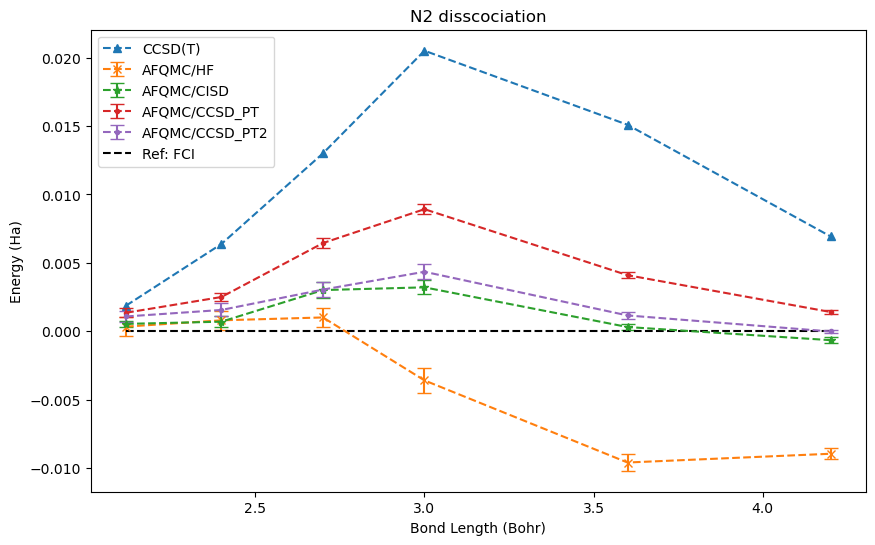

In [8]:
plt.figure(figsize=(10, 6))
plt.plot(bonds,ccsd_ts-refs, '^--', color='C0',label='CCSD(T)')
plt.errorbar(bonds,afqmc_hfs-refs,yerr=afqmc_hf_errs,fmt='x--',color='C1',capsize=5,label='AFQMC/HF')
plt.errorbar(bonds,afqmc_cisds-refs,yerr=afqmc_cisd_errs,fmt='*--',color='C2',capsize=5,label='AFQMC/CISD')
plt.errorbar(bonds,afqmc_pts-refs,yerr=afqmc_pt_errs,fmt='.--',color='C3',capsize=5,label='AFQMC/CCSD_PT')
plt.errorbar(bonds,afqmc_pt2s-refs,yerr=afqmc_pt2_errs,fmt='.--',color='C4',capsize=5,label='AFQMC/CCSD_PT2')
plt.plot(bonds,refs-refs, '--', color='black',label='Ref: FCI')
# plt.xticks(bonds)
plt.xlabel('Bond Length (Bohr)')
plt.ylabel('Energy (Ha)')
plt.title('N2 disscociation')
handles, labels = plt.gca().get_legend_handles_labels()
order = ['CCSD(T)', 'AFQMC/HF', 'AFQMC/CISD', 'AFQMC/CCSD_PT', 'AFQMC/CCSD_PT2', 'Ref: FCI']
ordered_handles = [handles[labels.index(l)] for l in order]
ordered_labels = order
plt.legend(ordered_handles, ordered_labels,loc='upper left')
plt.show()

In [14]:
import numpy as np
n_mol = len(bonds)
ccsd_t_msd = np.sqrt(np.sum((ccsd_ts-refs)**2)/n_mol)*1000
afqmc_hf_msd = np.sqrt(np.sum((afqmc_hfs-refs)**2)/n_mol)*1000
afqmc_cisd_msd = np.sqrt(np.sum((afqmc_cisds-refs)**2)/n_mol)*1000
afqmc_ccsd_pt_msd = np.sqrt(np.sum((afqmc_pts-refs)**2)/n_mol)*1000
afqmc_ccsd_pt2_msd = np.sqrt(np.sum((afqmc_pt2s-refs)**2)/n_mol)*1000
afqmc_hf_msd_err = np.sqrt(sum(afqmc_hf_errs**2)/n_mol)*1000
afqmc_cisd_msd_err = np.sqrt(sum(afqmc_cisd_errs**2)/n_mol)*1000
afqmc_ccsd_pt_msd_err = np.sqrt(sum(afqmc_pt_errs**2)/n_mol)*1000
afqmc_ccsd_pt2_msd_err = np.sqrt(sum(afqmc_pt2_errs**2)/n_mol)*1000
print('N2 dissociation ')
print(f'CCSD(T) RMSD from Ref {ccsd_t_msd:.1f} mHa')
print(f'AFQMC/HF RMSD from Ref {afqmc_hf_msd:.1f} +/- {afqmc_hf_msd_err:.1f} mHa')
print(f'AFQMC/CISD RMSD from Ref {afqmc_cisd_msd:.1f} +/- {afqmc_cisd_msd_err:.1f}  mHa')
print(f'AFQMC/CCSD_PT RMSD from Ref {afqmc_ccsd_pt_msd:.1f} +/- {afqmc_ccsd_pt_msd_err:.1f} mHa')
print(f'AFQMC/CCSD_PT2 RMSD from Ref {afqmc_ccsd_pt2_msd:.1f} +/- {afqmc_ccsd_pt2_msd_err:.1f} mHa')

N2 dissociation 
CCSD(T) RMSD from Ref 12.3 mHa
AFQMC/HF RMSD from Ref 5.6 +/- 0.7 mHa
AFQMC/CISD RMSD from Ref 1.9 +/- 0.4  mHa
AFQMC/CCSD_PT RMSD from Ref 5.0 +/- 0.3 mHa
AFQMC/CCSD_PT2 RMSD from Ref 2.3 +/- 0.4 mHa


In [ ]:
ccsd_t_ref = ccsd_ts-refs

array([0.00187, 0.00638, 0.013  , 0.0205 , 0.01509, 0.00693])

In [17]:
ccsd_t_ref = ccsd_ts-refs
afqmc_hf_ref = afqmc_hfs-refs
afqmc_cisd_ref = afqmc_cisds-refs
afqmc_pt_ref = afqmc_pts-refs
afqmc_pt2_ref = afqmc_pt2s-refs

In [21]:
print('Non-parallelity Error')
ccsd_t_npe = abs(ccsd_t_ref.max() - ccsd_t_ref.min())*1000
afqmc_hf_npe = abs(afqmc_hf_ref.max() - afqmc_hf_ref.min())*1000
afqmc_cisd_npe = abs(afqmc_cisd_ref.max() - afqmc_cisd_ref.min())*1000
afqmc_pt_npe = abs(afqmc_pt_ref.max() - afqmc_pt_ref.min())*1000
afqmc_pt2_npe = abs(afqmc_pt2_ref.max() - afqmc_pt2_ref.min())*1000
max_idx = np.argmax(afqmc_hf_ref)
min_idx = np.argmin(afqmc_hf_ref)
afqmc_hf_npe_err = np.sqrt(afqmc_hf_errs[max_idx]**2 + afqmc_hf_errs[min_idx]**2)*1000
max_idx = np.argmax(afqmc_cisd_ref)
min_idx = np.argmin(afqmc_cisd_ref)
afqmc_cisd_npe_err = np.sqrt(afqmc_cisd_errs[max_idx]**2 + afqmc_cisd_errs[min_idx]**2)*1000
max_idx = np.argmax(afqmc_pt_ref)
min_idx = np.argmin(afqmc_pt_ref)
afqmc_pt_npe_err = np.sqrt(afqmc_pt_errs[max_idx]**2 + afqmc_pt_errs[min_idx]**2)*1000
max_idx = np.argmax(afqmc_pt2_ref)
min_idx = np.argmin(afqmc_pt2_ref)
afqmc_pt2_npe_err = np.sqrt(afqmc_pt2_errs[max_idx]**2 + afqmc_pt2_errs[min_idx]**2)*1000
print(f'CCSD(T) NPE from Ref {ccsd_t_npe:.1f} mHa')
print(f'AFQMC/HF NPE from Ref {afqmc_hf_npe:.1f} +/- {afqmc_hf_npe_err:.1f} mHa')
print(f'AFQMC/CISD NPE from Ref {afqmc_cisd_npe:.1f} +/- {afqmc_cisd_npe_err:.1f}  mHa')
print(f'AFQMC/CCSD_PT NPE from Ref {afqmc_pt_npe:.1f} +/- {afqmc_pt_npe_err:.1f} mHa')
print(f'AFQMC/CCSD_PT2 NPE from Ref {afqmc_pt2_npe:.1f} +/- {afqmc_pt2_npe_err:.1f} mHa')

Non-parallelity Error
CCSD(T) NPE from Ref 18.6 mHa
AFQMC/HF NPE from Ref 10.6 +/- 0.9 mHa
AFQMC/CISD NPE from Ref 3.9 +/- 0.5  mHa
AFQMC/CCSD_PT NPE from Ref 7.6 +/- 0.5 mHa
AFQMC/CCSD_PT2 NPE from Ref 4.4 +/- 0.6 mHa
